---
title: "Distributions"
date: 2020-05-23
author: "Chanseok Kang"
toc: true 
categories: [Python, Datacamp]
image: images/income-cdf.png
title-block-banner: true
---

## TL;DR

> This post briefly introduces about Exploratory Data Analysis (EDA for short) using scientific python packages. It is a Summary of lecture "Exploratory Data Analysis in Python" from datacamp.

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm

### Load the Data

In [2]:
gss = pd.read_hdf('./dataset/gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### Make a Probability Mass Function (PMF)

In [3]:
year = gss['year']
# Compute the PMF for year
pmf_year = Pmf.from_seq(year, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64


### Plot a PMF

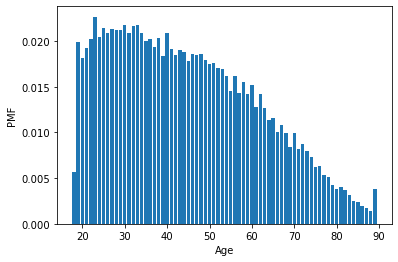

In [5]:
#| label: fig-gss_pmf
#| fig-cap: PMF of GSS for year
#| fig-align: center

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')

plt.show()

## Cumulative distribution functions

### Make a CDF

In [6]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))
print(1 - cdf_age(30))

0.2539137136526389
0.7460862863473612


### Compute IQR

In [7]:
income = gss['realinc']

cdf_income = Cdf.from_seq(income)

In [8]:
# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


### Plot a CDF

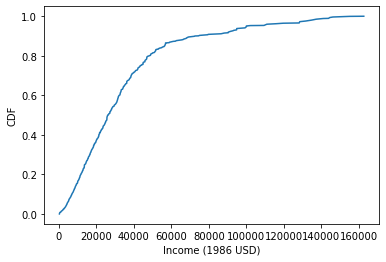

In [10]:
#| label: fig-gss_cdf
#| fig-cap: CDF of GSS for Income
#| fig-align: center

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')

plt.show()


## Comparing distribution

### Extract education levels

In [12]:
# Select educ
educ = gss['educ']

# Bachelor`s degree
bach = (educ >= 16)

# Associate degree
assc = ((educ >= 14) & (educ < 16))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


### Plot income CDFs

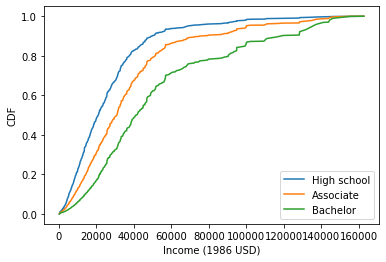

In [14]:
#| label: fig-gss_cdf2
#| fig-cap: CDF of GSS for Income
#| fig-align: center

income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

plt.show()

## Modeling distributions

### Distribution of income

In [15]:
# Extract realinc and compute its log
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


### Comparing CDFs

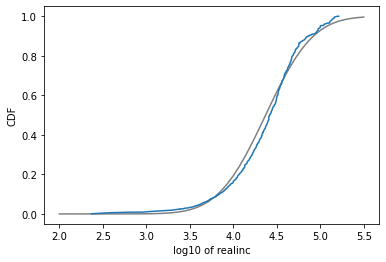

In [16]:
#| label: fig-gss_realincome_cdf
#| fig-cap: Comparing CDF of GSS for Real Income
#| fig-align: center

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

plt.show()

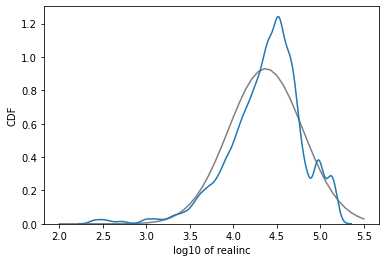

In [17]:
#| label: fig-gss_cdf_log10
#| fig-cap: CDF of GSS for Real Income (log based)
#| fig-align: center

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

plt.show()